In [1]:
import numpy as np
import pandas as pd
import pdb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import multiprocessing
import pdb

C:\Users\H\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
In C:\Users\H\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\H\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\H\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\H\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3

In [2]:
def data_prepare(data):
    data_copy = data.copy()
    numeric_col = list()
    category_col = list()
    for _col in data_copy.columns:
        try:
            data_copy.loc[:, _col] = data_copy.loc[:, _col].astype(np.float32)
            numeric_col.append(_col)
        except ValueError:
            label_encoder = LabelEncoder().fit(data_copy.loc[:, _col].values)
            _class = label_encoder.classes_
            tmp_col = label_encoder.transform(data_copy.loc[:, _col].values)
            if 'unknown' in _class:
                tmp_col = np.where(tmp_col==label_encoder.transform(['unknown']), np.nan, tmp_col)
            elif 'yes' in _class:
                tmp_col = np.where(tmp_col==label_encoder.transform(['yes']), 1, tmp_col)
            elif 'no' in _class:
                tmp_col = np.where(tmp_col==label_encoder.transform(['no']), 0, tmp_col)

            data_copy.loc[:, _col] = tmp_col.astype(np.float32)
            category_col.append(_col)

    return data_copy, numeric_col, category_col

In [3]:
data = pd.read_csv('D:/GT/ML/a1/bank-additional/bank-additional.csv', sep=';', header=0)
data_copy, numeric_col, category_col = data_prepare(data)
data_copy.mask(data_copy.isnull(), data_copy.median(0), axis=1, inplace=True)

x_train, x_test, y_train, y_test = train_test_split(data_copy.iloc[:, :-1], data_copy['y'], test_size=0.05, random_state=3407)

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### DT

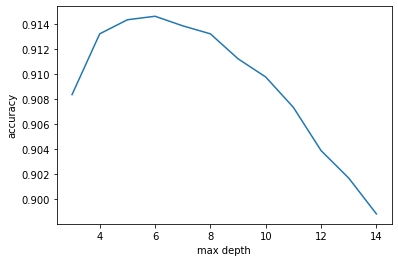

In [57]:
def md_score(d):
    dt = DecisionTreeClassifier(max_depth=d)
    return cross_val_score(dt, x_train, y_train, scoring='accuracy', cv=5).mean()

depths = np.arange(3, 15)
vals = np.linspace(0, 0.2, 100)
scores = [md_score(d) for d in depths]
plt.plot(depths, scores)
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.show()

In [6]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=6)
dt.fit(x_train, y_train)
print(dt.score(x_train, y_train))
print(cross_val_score(dt, x_train, y_train, scoring='accuracy', cv=5).mean())
print(dt.score(x_test, y_test))

0.9355992844364938
0.9067195160589641
0.8883495145631068


In [4]:
depths = np.arange(4, 9)
vals = np.linspace(0, 0.05, 5)
min_leaf = [1,5,10,20]
min_split = [10,20,40,60,100]
param_grid = [{'min_impurity_decrease': vals, 'max_depth': depths, 'criterion': ['gini', 'entropy'], 
               'min_samples_leaf':min_leaf, 'min_samples_split':min_split}]
gs = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, scoring='accuracy', cv=5, return_train_score=True)
gscv = gs.fit(x_train, y_train)
print('gscv')
cv_result = pd.DataFrame.from_dict(gscv.cv_results_)
with open('cv_result.csv', 'w') as f:
    cv_result.to_csv(f)
print(gscv.best_estimator_)

gscv
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [7]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=4, min_impurity_decrease=0.0, min_samples_leaf=10, min_samples_split=20)
dt.fit(x_train, y_train)
print(dt.score(x_train, y_train))
print(cross_val_score(dt, x_train, y_train, scoring='accuracy', cv=5).mean())
print(dt.score(x_test, y_test))

0.9171990799897777
0.9072306983763021
0.9029126213592233


In [8]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=6, min_impurity_decrease=0.0, min_samples_leaf=10, min_samples_split=20)
dt.fit(x_train, y_train)
print(dt.score(x_train, y_train))
print(cross_val_score(dt, x_train, y_train, scoring='accuracy', cv=5).mean())
print(dt.score(x_test, y_test))

0.9297214413493483
0.9069752705346673
0.9174757281553398


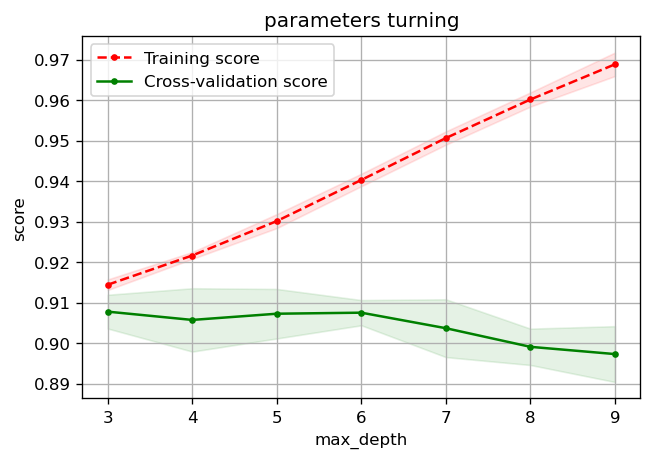

In [9]:
param_grid = [{'max_depth': depths}]
gs = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, scoring='accuracy', cv=5, return_train_score=True)
gscv = gs.fit(x_train, y_train)
train_scores_mean = gscv.cv_results_['mean_train_score']
train_scores_std = gscv.cv_results_['std_train_score']
test_scores_mean = gscv.cv_results_['mean_test_score']
test_scores_std = gscv.cv_results_['std_test_score']
plt.figure(figsize=(6, 4), dpi=120)   # 指定了大小和分辨率，还有背景颜色facecolor，还可以有边框之类的
plt.title('parameters turning')
plt.grid()
plt.xlabel('max_depth')
plt.ylabel('score')
plt.fill_between(depths, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(depths, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(depths, train_scores_mean, '.--', color="r", label="Training score")
plt.plot(depths, test_scores_mean, '.-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

### GBDT

In [11]:
dt = GradientBoostingClassifier()
dt.fit(x_train, y_train)
print(cross_val_score(dt, x_train, y_train, scoring='accuracy', cv=5).mean())
print(dt.score(x_test, y_test))

0.9110637491711661
0.9223300970873787


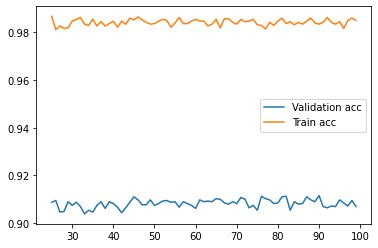

In [13]:
accuracy = []
train_acc = []
max_estimators = 100
for i in range(25, max_estimators):
    score = cross_val_score(GradientBoostingClassifier(
        n_estimators=i, learning_rate=10.0/float(i), 
        max_depth=6, min_samples_leaf=10, min_samples_split=20), 
                            x_train, y_train, cv=5, scoring='accuracy').mean()
    model = GradientBoostingClassifier(
        n_estimators=i, learning_rate=10.0/float(i), 
        max_depth=6, min_samples_leaf=10, min_samples_split=20)
    model.fit(x_train, y_train)
    accuracy.append(score)
    train_acc.append(model.score(x_train, y_train))
plt.plot(range(25, max_estimators), accuracy, label='Validation acc')
plt.plot(range(25, max_estimators), train_acc, label='Train acc')
plt.legend()
plt.show()

In [14]:
pd.Series(accuracy).sort_values()

8     0.903907
17    0.904418
10    0.904674
2     0.904675
3     0.904932
58    0.905440
50    0.905441
9     0.905443
35    0.906208
13    0.906208
67    0.906463
18    0.906464
48    0.906464
16    0.906719
31    0.906719
66    0.906974
69    0.906975
74    0.906976
7     0.906978
72    0.907231
68    0.907231
34    0.907484
49    0.907486
11    0.907486
25    0.907486
5     0.907486
23    0.907740
22    0.907741
60    0.907997
43    0.907997
        ...   
32    0.909019
59    0.909019
64    0.909019
30    0.909019
37    0.909020
39    0.909020
12    0.909021
14    0.909021
38    0.909274
27    0.909276
1     0.909530
73    0.909531
28    0.909531
24    0.909784
63    0.909785
53    0.909785
70    0.909785
36    0.909786
21    0.909786
47    0.910041
41    0.910043
52    0.910297
40    0.910298
46    0.910807
62    0.911063
56    0.911063
20    0.911064
51    0.911318
57    0.911319
65    0.911576
Length: 75, dtype: float64

In [21]:
vals = np.linspace(0.03, 0.1, 8)
min_leaf = [20,40,60,80,100,120]
min_split = [100,200,40,600,800]
param_grid = [{'min_impurity_decrease': vals, 
               'min_samples_leaf':min_leaf, 'min_samples_split':min_split}]
gs = GridSearchCV(estimator=GradientBoostingClassifier(max_depth=6, n_estimators=90, learning_rate=10/90), 
                  param_grid=param_grid, scoring='accuracy', cv=5, return_train_score=True)
gscv = gs.fit(x_train, y_train)
print('gscv')
cv_result = pd.DataFrame.from_dict(gscv.cv_results_)
with open('cv_result.csv', 'w') as f:
    cv_result.to_csv(f)
print(gscv.best_estimator_)

gscv
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1111111111111111, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.05, min_impurity_split=None,
              min_samples_leaf=80, min_samples_split=600,
              min_weight_fraction_leaf=0.0, n_estimators=90,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


In [22]:
gbdt = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=10/90, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.05,
              min_impurity_split=None, min_samples_leaf=80,
              min_samples_split=600, min_weight_fraction_leaf=0.0,
              n_estimators=90, presort='auto', random_state=3407,
              subsample=1.0, verbose=0, warm_start=False)
gbdt.fit(x_train, y_train)
print(gbdt.score(x_train, y_train))
print(cross_val_score(gbdt, x_train, y_train, scoring='accuracy', cv=5).mean())
print(gbdt.score(x_test, y_test))

0.9348326092512139
0.9177091192965608
0.912621359223301


### SVM

In [23]:
svc = SVC(kernel='linear')
print(cross_val_score(svc, x_train, y_train, scoring='accuracy', cv=5).mean())
svc.fit(x_train, y_train)
sep = np.array(svc.support_vectors_).reshape(-1, 2)

0.8998242708711004


In [24]:
# 调参主要使用C系数（松弛变量），核函数的选择， 还有degree是poly的次数，gamma是核函数的系数
param_grid = [{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.5, 1.0, 3.0, 5.0, 8.0, 12.0, 15.0, 20.0]}]
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy', cv=5,
                    n_jobs=multiprocessing.cpu_count())
gs.fit(x_train, y_train)
print(gs.best_estimator_)
print(gs.best_score_)

SVC(C=20.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.909276769741886


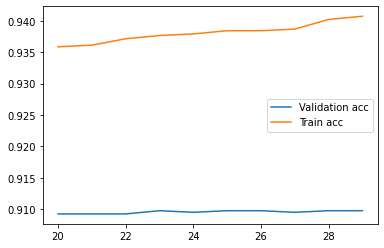

In [25]:
accuracy = []
train_acc = []
for i in range(20, 30):
    score = cross_val_score(SVC(C=i, kernel='linear'), x_train, y_train, cv=5, scoring='accuracy').mean()
    model = SVC(C=i, kernel='rbf', gamma=0.2)
    model.fit(x_train, y_train)
    accuracy.append(score)
    train_acc.append(model.score(x_train, y_train))
plt.plot(range(20, 30), accuracy, label='Validation acc')
plt.plot(range(20, 30), train_acc, label='Train acc')
plt.legend()
plt.show()

In [28]:
svc = SVC(kernel='linear', C=23)
print(cross_val_score(svc, x_train, y_train, scoring='accuracy', cv=5).mean())
svc.fit(x_train, y_train)
print(svc.score(x_train, y_train))
sep = np.array(svc.support_vectors_).reshape(-1, 2)
# print(sep)
print(svc.score(x_test, y_test))

0.9097895496696096
0.9108101201124457
0.9466019417475728


### KNN

In [29]:
param_grid = [{'weights': ['uniform','distance'], 'n_neighbors': [15, 20, 25, 30, 35, 40]}]
gs = GridSearchCV(estimator=KNeighborsClassifier(algorithm='auto'), 
                  param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=multiprocessing.cpu_count())
gs.fit(x_train, y_train)
print(gs.best_estimator_)
print(gs.best_score_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=40, p=2,
           weights='distance')
0.8990544339381549


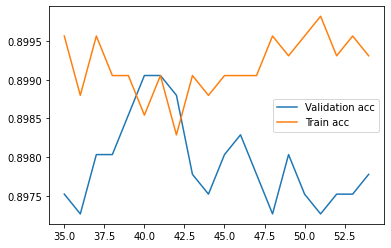

In [30]:
accuracy = []
train_acc = []
for i in range(35, 55):
    score = cross_val_score(KNeighborsClassifier(n_neighbors=i, algorithm='auto', weights='distance'), 
                            x_train, y_train, cv=5, scoring='accuracy').mean()
    model = KNeighborsClassifier(n_neighbors=i, algorithm='auto', weights='uniform')
    model.fit(x_train, y_train)
    accuracy.append(score)
    train_acc.append(model.score(x_train, y_train))
plt.plot(range(35, 55), accuracy, label='Validation acc')
plt.plot(range(35, 55), train_acc, label='Train acc')
plt.legend()
plt.show()

In [32]:
knn = KNeighborsClassifier(n_neighbors=40, weights='distance', algorithm='auto')
print(cross_val_score(knn, x_train, y_train, scoring='accuracy', cv=5).mean())
knn.fit(x_train, y_train)
print(knn.score(x_test, y_test))
print(knn.score(x_train, y_train))

0.8990553742736476
0.9563106796116505
1.0


### ANN

In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

In [35]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(20, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)
        self.bn1 = nn.BatchNorm1d(64)
        self.bn2 = nn.BatchNorm1d(32)
        self.dropout = nn.Dropout(0.125)
        self.relu = nn.ReLU()
        
        self.apply(self._init_weights)
    
    def forward(self, x):
        x_copy = x.clone()
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        #x = self.relu(self.bn1(self.fc1(x)))
        #x = self.dropout(x)
        #x = self.relu(self.bn2(self.fc2(x)))
        #x = self.dropout(x)
        x = self.fc3(x)
        return x#.squeeze()
    
    def _init_weights(self, m):
        if isinstance(m, nn.Linear):
            nn.init.xavier_uniform_(m.weight)
            nn.init.constant_(m.bias, 0)
        elif isinstance(m, nn.BatchNorm1d):
            nn.init.constant_(m.bias, 0)
            nn.init.constant_(m.weight, 1)

In [36]:
batch_size = 64
train_dataset = TensorDataset(torch.Tensor(x_train), torch.Tensor(y_train.values))
train_length = int(len(train_dataset) * 0.9)
train_dataset, dev_dataset = random_split(train_dataset, [train_length, len(train_dataset)-train_length])
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
dev_loader = DataLoader(dev_dataset, batch_size=batch_size, shuffle=False)

test_dataset = TensorDataset(torch.Tensor(x_test), torch.Tensor(y_test.values))
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [37]:
batch_num = np.ceil(train_length / batch_size)
epoch = 80
max_lr = 0.3

#torch.cuda.empty_cache()
torch.manual_seed(3407)
model = MLP()

In [38]:
batch_loss = list()
batch_acc = list()
eval_loss = list()
eval_acc = list()
pred_list = list()
target_list = list()
tmp_eval_loss = 0
tmp_max_loss = -np.inf
patience_charge = 0

In [39]:
optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=max_lr, weight_decay=1e-03, amsgrad=False)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10*batch_num, gamma=0.8, last_epoch=-1)
loss_fn = nn.CrossEntropyLoss()

Epoch: 0, batch: 0, loss: 1.063
Epoch: 0, train ave.acc: 0.809
dev set:
Epoch: 0, dev ave.loss: 0.4038, ave.acc: 0.88

Epoch: 1, batch: 0, loss: 0.3455
Epoch: 1, train ave.acc: 0.889
dev set:
Epoch: 1, dev ave.loss: 0.4006, ave.acc: 0.88

Epoch: 2, batch: 0, loss: 0.2807
Epoch: 2, train ave.acc: 0.889
dev set:
Epoch: 2, dev ave.loss: 0.3984, ave.acc: 0.88

Epoch: 3, batch: 0, loss: 0.2961
Epoch: 3, train ave.acc: 0.889
dev set:
Epoch: 3, dev ave.loss: 0.3985, ave.acc: 0.88

Epoch: 4, batch: 0, loss: 0.3243
Epoch: 4, train ave.acc: 0.889
dev set:
Epoch: 4, dev ave.loss: 0.4054, ave.acc: 0.88

Epoch: 5, batch: 0, loss: 0.3112
Epoch: 5, train ave.acc: 0.889
dev set:
Epoch: 5, dev ave.loss: 0.3991, ave.acc: 0.88

Epoch: 6, batch: 0, loss: 0.1903
Epoch: 6, train ave.acc: 0.889
dev set:
Epoch: 6, dev ave.loss: 0.3982, ave.acc: 0.88

Epoch: 7, batch: 0, loss: 0.4368
Epoch: 7, train ave.acc: 0.889
dev set:
Epoch: 7, dev ave.loss: 0.407, ave.acc: 0.88

Epoch: 8, batch: 0, loss: 0.3111
Epoch: 8,

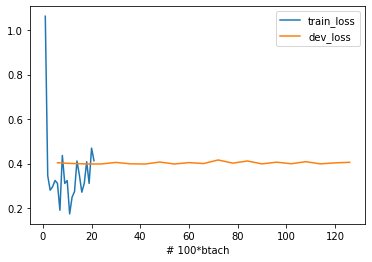

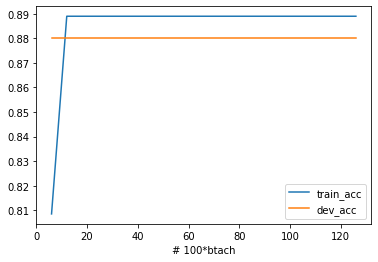

In [40]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#model = model.to(device, non_blocking=True)

for epoch_id in range(epoch):
    model.train()
    pred_list = list()
    target_list = list()
    for batch_id, (_input, _target) in enumerate(train_loader):
        if torch.cuda.is_available():
            device = next(model.parameters()).device
            _input = _input.to(device, non_blocking=True)
            _target = _target.to(device, non_blocking=True).long()
        _output = model(_input)
        #_output = torch.max(F.softmax(_output,dim=0),1)[1]
        loss = loss_fn(_output, _target)
        
        _output = torch.max(F.softmax(_output,dim=0),1)[1]
        pred_list.extend(_output.numpy())
        target_list.extend(_target.numpy())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()
        
        if batch_id % 100 == 0:
            print('Epoch: {}, batch: {}, loss: {:.4}'.format(epoch_id, batch_id, loss.item()))
            batch_loss.append(loss.item())
        
        del _input, _target, loss
        
    batch_acc.append(np.sum(np.array(pred_list)==np.array(target_list)) / len(target_list))
    print('Epoch: {}, train ave.acc: {:.3}'.format(epoch_id, batch_acc[-1]))
        
    print('dev set:')
    model.eval()
    tmp_eval_loss = 0.0
    pred_list = list()
    target_list = list()
    for batch_id, (_input, _target) in enumerate(dev_loader):
        if torch.cuda.is_available():
            device = next(model.parameters()).device
            _input = _input.to(device, non_blocking=True)
            _target = _target.to(device, non_blocking=True).long()
        with torch.no_grad():
            _output = model(_input)
            loss = loss_fn(_output, _target)
            tmp_eval_loss += loss.item()
            
            _output = torch.max(F.softmax(_output,dim=0),1)[1]
            pred_list.extend(_output.numpy())
            target_list.extend(_target.numpy())

    eval_loss.append(tmp_eval_loss / (batch_id+1))
    eval_acc.append(np.sum(np.array(pred_list)==np.array(target_list)) / len(target_list))
    print('Epoch: {}, dev ave.loss: {:.4}, ave.acc: {:.3}'.format(epoch_id, eval_loss[-1], eval_acc[-1]))
    print()
    if eval_acc[-1] > tmp_max_loss:
        tmp_max_loss = eval_acc[-1]
        patience_charge = 0
        torch.save(model, './tmp_model.pkl')
    else:
        patience_charge += 1
    
    if patience_charge == 20:
        print('Early stop at epoch {}'.format(epoch_id))
        break

model = model.to('cpu')
model = torch.load('./tmp_model.pkl')

print('test set:')
model.eval()
tmp_eval_loss = 0.0
for batch_id, (_input, _target) in enumerate(test_loader):
    if torch.cuda.is_available():
        device = next(model.parameters()).device
        _input = _input.to(device, non_blocking=True)
        _target = _target.to(device, non_blocking=True).long()
    with torch.no_grad():
        _output = model(_input)
        loss = loss_fn(_output, _target)
    tmp_eval_loss += loss.item()
print('Epoch: {}, test ave.loss: {:.4}'.format(epoch_id, tmp_eval_loss / (batch_id+1)))

plt.figure()
plt.plot(list(range(1, len(batch_loss)+1)), batch_loss, label='train_loss')
plt.plot(np.arange(1, len(eval_loss)+1)*6, eval_loss, label='dev_loss')
plt.legend()
plt.xlabel('# 100*btach')
plt.show()

plt.figure()
plt.plot(np.arange(1, len(batch_acc)+1)*6, batch_acc, label='train_acc')
plt.plot(np.arange(1, len(eval_acc)+1)*6, eval_acc, label='dev_acc')
plt.legend()
plt.xlabel('# 100*btach')
plt.show()

In [41]:
model.eval()
pred_list = list()
target_list = list()
for batch_id, (_input, _target) in enumerate(train_loader):
    if torch.cuda.is_available():
        device = next(model.parameters()).device
        _input = _input.to(device, non_blocking=True)
        _target = _target.to(device, non_blocking=True).long()
    with torch.no_grad():
        _output = model(_input)
        _output = torch.max(F.softmax(_output,dim=0),1)[1]
        pred_list.extend(_output.numpy())
        target_list.extend(_target.numpy())

acc = np.sum(np.array(pred_list)==np.array(target_list)) / len(target_list)
print('train ave.acc: {:.4}'.format(acc))

pred_list = list()
target_list = list()
for batch_id, (_input, _target) in enumerate(dev_loader):
    if torch.cuda.is_available():
        device = next(model.parameters()).device
        _input = _input.to(device, non_blocking=True)
        _target = _target.to(device, non_blocking=True).long()
    with torch.no_grad():
        _output = model(_input)
        _output = torch.max(F.softmax(_output,dim=0),1)[1]
        pred_list.extend(_output.numpy())
        target_list.extend(_target.numpy())

acc = np.sum(np.array(pred_list)==np.array(target_list)) / len(target_list)
print('dev ave.acc: {:.4}'.format(acc))

pred_list = list()
target_list = list()
for batch_id, (_input, _target) in enumerate(test_loader):
    if torch.cuda.is_available():
        device = next(model.parameters()).device
        _input = _input.to(device, non_blocking=True)
        _target = _target.to(device, non_blocking=True).long()
    with torch.no_grad():
        _output = model(_input)
        _output = torch.max(F.softmax(_output,dim=0),1)[1]
        pred_list.extend(_output.numpy())
        target_list.extend(_target.numpy())

acc = np.sum(np.array(pred_list)==np.array(target_list)) / len(target_list)
print('test ave.acc: {:.4}'.format(acc))

train ave.acc: 0.889
dev ave.acc: 0.8801
test ave.acc: 0.9369
